In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [689]:
data = pd.read_csv(filepath_or_buffer='./giRNA_clustering_ALL_SAMPLES_v2.txt', header=0, delimiter='\t')
data
# Add UMI + giRNAseq column to control for PCR bias amplification
data['Bias'] = data['UMI'] + '_' + data['giRNAseq']
data

,Sample_id,Frequency,UMI,giRNAseq,giRNA_ID,Sublibrary,Gene_name,Bias
0,7773.1,1,AAATAAATAACTT,GCTGGGCCTGCCTGAAAAGT,NUBPL_+_32030881.23-P1P2,h4,NUBPL,AAATAAATAACTT_GCTGGGCCTGCCTGAAAAGT
1,7773.1,1,AAATAAATAGCTG,GTGGGAACAGTTGCAGTAGG,PLN_+_118869437.23-P1P2,h4,PLN,AAATAAATAGCTG_GTGGGAACAGTTGCAGTAGG
2,7773.1,1,AAATAAATCAGTC,GTAGTCTGCTTGGAGAGGAG,RAPGEF2_-_160189500.23-ENST00000264431.4,h4,RAPGEF2,AAATAAATCAGTC_GTAGTCTGCTTGGAGAGGAG
3,7773.1,1,AAATAAATCAGTT,GGATGCACTGGGCGGGATCA,SNRPD3_+_24951437.23-P1P2,h4,SNRPD3,AAATAAATCAGTT_GGATGCACTGGGCGGGATCA
4,7773.1,1,AAATAAATCCCTA,GCTTCCTAGGAGCCTTCCTG,DOC2A_-_30023587.23-P2,h4,DOC2A,AAATAAATCCCTA_GCTTCCTAGGAGCCTTCCTG
...,...,...,...,...,...,...,...,...
398601,7773.4,2,TTTTTATTAACTC,GAGAGCCTCACAGCTCCGGA,SGCB_+_52904784.23-P1P2,h4,SGCB,TTTTTATTAACTC_GAGAGCCTCACAGCTCCGGA
398602,7773.4,2,TTTTTCATGGATT,GGAAGCAGCGTCAGGACCAT,SARM1_+_26699050.23-P2,h4,SARM1,TTTTTCATGGATT_GGAAGCAGCGTCAGGACCAT
398603,7773.4,2,TTTTTGATGAGTG,GTGTACTACCAGATGTTAAA,RGS3_+_116222979.23-ENST00000350696.5,h4,RGS3,TTTTTGATGAGTG_GTGTACTACCAGATGTTAAA
398604,7773.4,2,TTTTTTCTAATTG,GAGGGCCCCGGGACTTGCAG,DNAH7_-_196933531.23-P1P2,h4,DNAH7,TTTTTTCTAATTG_GAGGGCCCCGGGACTTGCAG


In [690]:
# Print out some stats about the dataset
total_number_identified_girnas = len(data['giRNAseq'].unique())
total_number_represented_genes = len(data.loc[(data['Gene_name']!='NO') & (data['Gene_name']!='non-targeting')]['Gene_name'].unique())
total_number_annotated_girnas = len(data.loc[(data['Gene_name']!='NO') & (data['Gene_name']!='non-targeting')]['giRNAseq'].unique())
print(f"Total number of identified giRNAs = {total_number_identified_girnas}")
print(f"Total number of identified annotated giRNAs = {total_number_annotated_girnas}")
print(f"Total number of represented genes = {total_number_represented_genes}")

Total number of identified giRNAs = 18238
Total number of identified annotated giRNAs = 12390
Total number of represented genes = 2426


In [691]:
bias_counts = data.groupby(by='Bias').count()['UMI']
bias_counts
biased_giRNAs = bias_counts[bias_counts > 1]
print('Total number of UMI-giRNA pairs with 2 or more counts =',len(biased_giRNAs))
print('Maximum number of copies across UMI-giRNA pairs =',max(biased_giRNAs))

Total number of UMI-giRNA pairs with 2 or more counts = 8
Maximum number of copies across UMI-giRNA pairs = 2


In [692]:
# Remove rows with PCR bias (same combination of UMI+giRNAseq)
data.drop_duplicates(subset='Bias', keep='first', inplace=True)
data

,Sample_id,Frequency,UMI,giRNAseq,giRNA_ID,Sublibrary,Gene_name,Bias
0,7773.1,1,AAATAAATAACTT,GCTGGGCCTGCCTGAAAAGT,NUBPL_+_32030881.23-P1P2,h4,NUBPL,AAATAAATAACTT_GCTGGGCCTGCCTGAAAAGT
1,7773.1,1,AAATAAATAGCTG,GTGGGAACAGTTGCAGTAGG,PLN_+_118869437.23-P1P2,h4,PLN,AAATAAATAGCTG_GTGGGAACAGTTGCAGTAGG
2,7773.1,1,AAATAAATCAGTC,GTAGTCTGCTTGGAGAGGAG,RAPGEF2_-_160189500.23-ENST00000264431.4,h4,RAPGEF2,AAATAAATCAGTC_GTAGTCTGCTTGGAGAGGAG
3,7773.1,1,AAATAAATCAGTT,GGATGCACTGGGCGGGATCA,SNRPD3_+_24951437.23-P1P2,h4,SNRPD3,AAATAAATCAGTT_GGATGCACTGGGCGGGATCA
4,7773.1,1,AAATAAATCCCTA,GCTTCCTAGGAGCCTTCCTG,DOC2A_-_30023587.23-P2,h4,DOC2A,AAATAAATCCCTA_GCTTCCTAGGAGCCTTCCTG
...,...,...,...,...,...,...,...,...
398601,7773.4,2,TTTTTATTAACTC,GAGAGCCTCACAGCTCCGGA,SGCB_+_52904784.23-P1P2,h4,SGCB,TTTTTATTAACTC_GAGAGCCTCACAGCTCCGGA
398602,7773.4,2,TTTTTCATGGATT,GGAAGCAGCGTCAGGACCAT,SARM1_+_26699050.23-P2,h4,SARM1,TTTTTCATGGATT_GGAAGCAGCGTCAGGACCAT
398603,7773.4,2,TTTTTGATGAGTG,GTGTACTACCAGATGTTAAA,RGS3_+_116222979.23-ENST00000350696.5,h4,RGS3,TTTTTGATGAGTG_GTGTACTACCAGATGTTAAA
398604,7773.4,2,TTTTTTCTAATTG,GAGGGCCCCGGGACTTGCAG,DNAH7_-_196933531.23-P1P2,h4,DNAH7,TTTTTTCTAATTG_GAGGGCCCCGGGACTTGCAG


In [693]:
# Replace gene names with giRNAseqs for Gene_names = 'NO' or 'non-argeting'

my_index1 = list(data.loc[data['Gene_name']=='NO'].index)
my_girnaseq = list(data.loc[data['Gene_name']=='NO']['giRNAseq'])
data.at[my_index1,'Gene_name'] = my_girnaseq

my_index2 = list(data.loc[data['Gene_name']=='non-targeting'].index)
my_girnaseq = list(data.loc[data['Gene_name']=='non-targeting']['giRNAseq'])
data.at[my_index2,'Gene_name'] = my_girnaseq

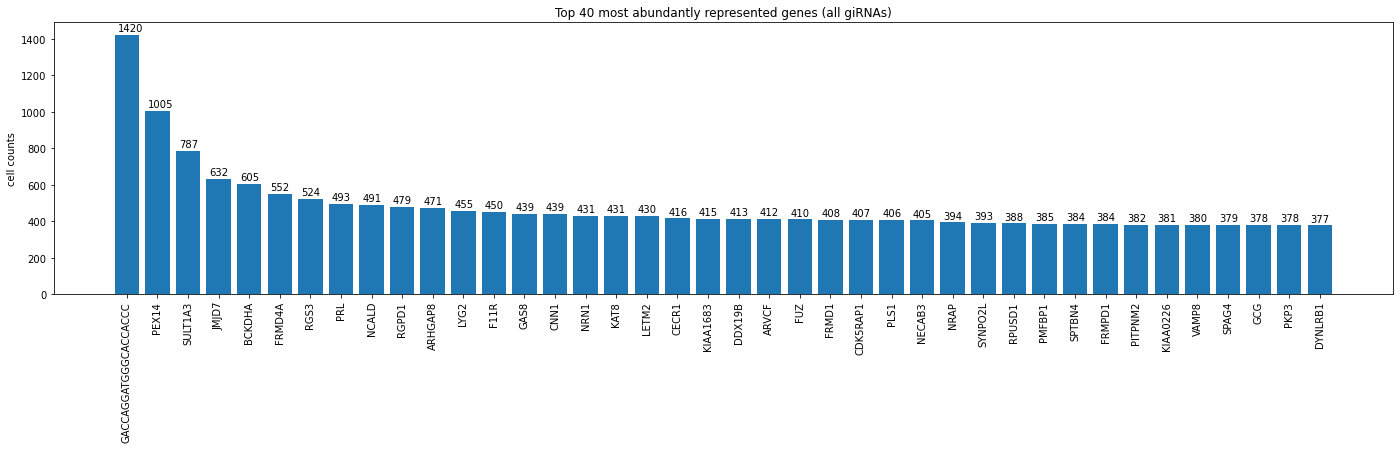

In [694]:
# How many giRNAs were assigned to each gene?
#ATATTCCTCTCTG_GACGAGGCGCTAGGGAACAA
girna_per_gene = data.groupby(['Gene_name']).count().sort_values(by='Bias', ascending=False)['giRNAseq']
girna_per_gene.head(n=20)

# Save results
girna_per_gene.to_csv(path_or_buf='giRNAs_frequency.csv')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.3,y[i]+20,y[i])


xvals = list(girna_per_gene.head(40).index)
yvals = list(girna_per_gene.head(40).values)

fig, ax = plt.subplots(figsize=(24, 5),facecolor='w')
plt.bar(x=xvals, 
        height=yvals, 
        log=False)
plt.xticks(rotation=90)

# calling the function to add value labels
addlabels(xvals, yvals)
plt.ylabel('cell counts')
plt.title('Top 40 most abundantly represented genes (all giRNAs)')
plt.savefig('giRNAs_per_gene.pdf')
plt.show()



In [695]:
# Drop NO_giRNA_HIT and non-targeting
data.drop(my_index1 + my_index2, inplace=True)

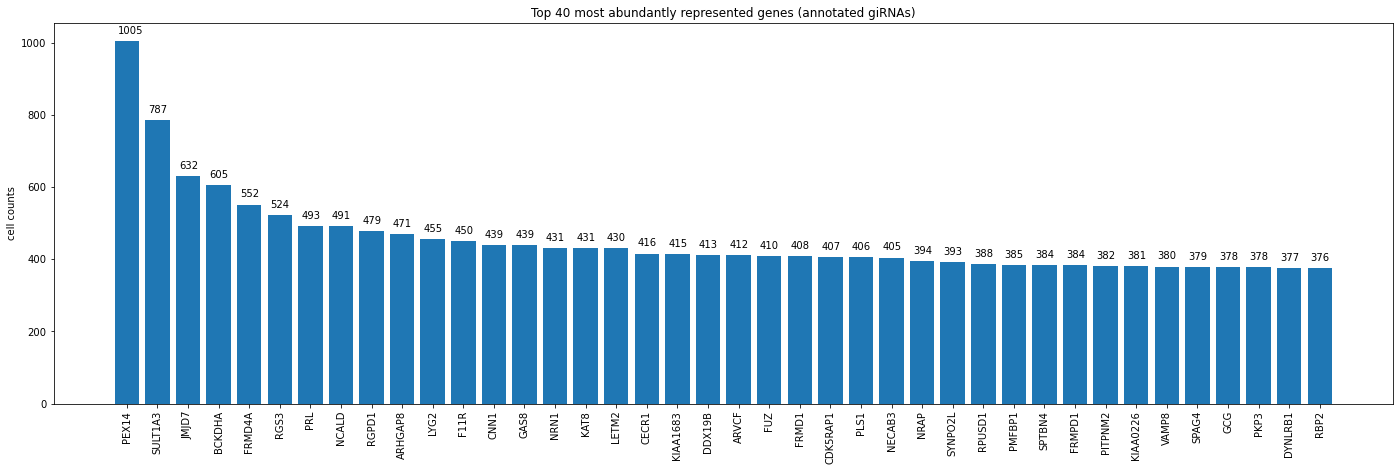

In [696]:
# How many giRNAs were assigned to each gene?
#ATATTCCTCTCTG_GACGAGGCGCTAGGGAACAA
girna_per_gene = data.groupby(['Gene_name']).count().sort_values(by='Bias', ascending=False)['giRNAseq']
girna_per_gene.head(n=20)

# Save results
girna_per_gene.to_csv(path_or_buf='giRNAs_per_gene.csv')

xvals = list(girna_per_gene.head(40).index)
yvals = list(girna_per_gene.head(40).values)

fig, ax = plt.subplots(figsize=(24, 7),facecolor='w')
plt.bar(x=xvals, 
        height=yvals, 
        log=False)
plt.xticks(rotation=90)

# calling the function to add value labels
addlabels(xvals, yvals)
plt.ylabel('cell counts')
plt.title('Top 40 most abundantly represented genes (annotated giRNAs)')
plt.savefig('annotated_giRNAs_per_gene.pdf')

plt.show()

In [697]:
counts_per_gene_per_girna = pd.DataFrame(data.groupby(['Gene_name','giRNAseq']).count().sort_values(by=['giRNAseq'], ascending=False)['Sample_id'])
counts_per_gene_per_girna.columns = ['perc_giRNA_per_gene']
counts_per_gene_per_girna.sort_values(by='perc_giRNA_per_gene', ascending=False).head(40)
counts_per_gene_per_girna.columns
girna_perc_per_gene = counts_per_gene_per_girna['perc_giRNA_per_gene']/counts_per_gene_per_girna.groupby(['Gene_name'])['perc_giRNA_per_gene'].transform('sum')
girna_perc_per_gene.to_csv('percentage_giRNAs_per_gene.csv')

biased_giRNAs = girna_perc_per_gene[girna_perc_per_gene>=0.75].sort_values(ascending=False)
biased_giRNAs.to_csv('percentage_giRNAs_per_gene_0.75cutoff.csv')
biased_giRNAs


Gene_name       giRNAseq            
ARSK            GTTCTCTTCTACAAACGCCG    1.000000
FAM204A         GCGCTGCGACGCCCCTTTCG    1.000000
DOLK            GCGCCAGCGGGCCGTGTGTG    1.000000
WDR83OS         GCGAACAAAGTGCTGAGGTG    1.000000
B9D2            GCCGTTAAGTGCGCTAAGGT    1.000000
                                          ...   
C15orf38-AP3S2  GGCCACGGTTCTCTCAGCAC    0.770115
ACTL7A          GTTCAGGCCTTGAATCCAGT    0.766082
TRMT44          GGTTGAACTGTGGAATGTGT    0.750000
PFDN2           GTCGCAGGGTCCAATCCGGA    0.750000
RBM18           GTCCCCTCGAGGCCCTGTCA    0.750000
Name: perc_giRNA_per_gene, Length: 172, dtype: float64

In [698]:
# Number of different giRNAs per gene (see excel spreadsheet for list of candidate under/overrepresented giRNAs per gene)
girna_perc_per_gene_group = girna_perc_per_gene.groupby(level=0)
girna_number_per_gene_group = girna_perc_per_gene_group.count().sort_values(ascending=False)
girna_number_per_gene_group.name = 'giRNA_number_per_gene'
girna_number_per_gene_group.to_csv('giRNA_number_per_gene.csv')

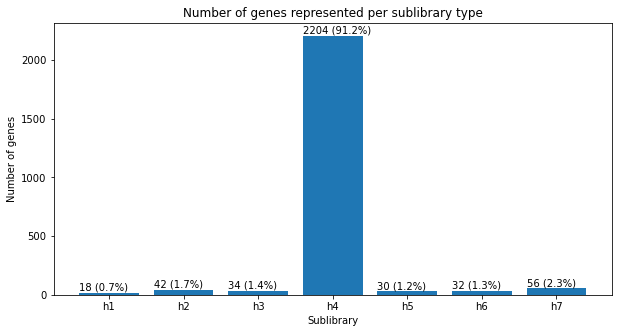

In [699]:
# What proportion are h4 genes compared to the total?
gene_names_nr = data.drop_duplicates(subset=['Gene_name'])
count_genes_per_sublibrary = gene_names_nr.groupby(by=['Sublibrary']).count()['Bias']
count_genes_per_sublibrary.name = 'Number_of_genes'
count_genes_per_sublibrary.to_csv('Number_of_genes_per_sublibrary.csv')


# function to add value labels
def addlabels(x,y, rot=0):
    my_total = sum(y)
    my_perc = y/my_total 
    my_perc = [round(z, ndigits= 1) for z in list((y / my_total) * 100)]
    for i in range(len(x)):
        plt.text(i-0.4,y[i]+20, f"{y[i]} ({my_perc[i]}%)", rotation=rot)


# Generate plot
xvals = list(count_genes_per_sublibrary.index)
yvals = list(count_genes_per_sublibrary.values)

fig, ax = plt.subplots(figsize=(10, 5),facecolor='w')
plt.bar(x=xvals, 
        height=yvals, 
        log=False)
#plt.xticks(rotation=90)

# calling the function to add value labels
addlabels(xvals, yvals)

plt.title('Number of genes represented per sublibrary type')
plt.xlabel('Sublibrary')
plt.ylabel('Number of genes')
plt.savefig('gene_per_sublibrary.pdf')
plt.show()  


In [700]:
len(gene_names_nr['Gene_name'].unique())

2426

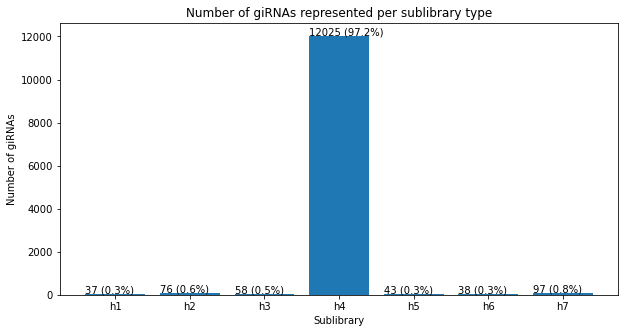

In [701]:
# What proportion are h4 giRNAs compared to the total?
girnas_nr = data.drop_duplicates(subset=['giRNAseq'])
count_girnas_per_sublibrary = girnas_nr.groupby(by=['Sublibrary']).count()['Bias']
count_girnas_per_sublibrary.name = 'Number_of_giRNAs'
count_girnas_per_sublibrary.to_csv('Number_of_giRNAs_per_sublibrary_type.csv')

# Generate plot
xvals = list(count_girnas_per_sublibrary.index)
yvals = list(count_girnas_per_sublibrary.values)

fig, ax = plt.subplots(figsize=(10, 5),facecolor='w')
plt.bar(x=xvals, 
        height=yvals, 
        log=False)

#plt.xticks(rotation=90)

# calling the function to add value labels
addlabels(xvals, yvals)

plt.title('Number of giRNAs represented per sublibrary type')
plt.xlabel('Sublibrary')
plt.ylabel('Number of giRNAs')
plt.savefig('Number_of_giRNAs_per_sublibrary_type.pdf')
plt.show()

In [702]:
len(girnas_nr['giRNAseq'])
yvals
count_girnas_per_sublibrary

Sublibrary
h1       37
h2       76
h3       58
h4    12025
h5       43
h6       38
h7       97
Name: Number_of_giRNAs, dtype: int64

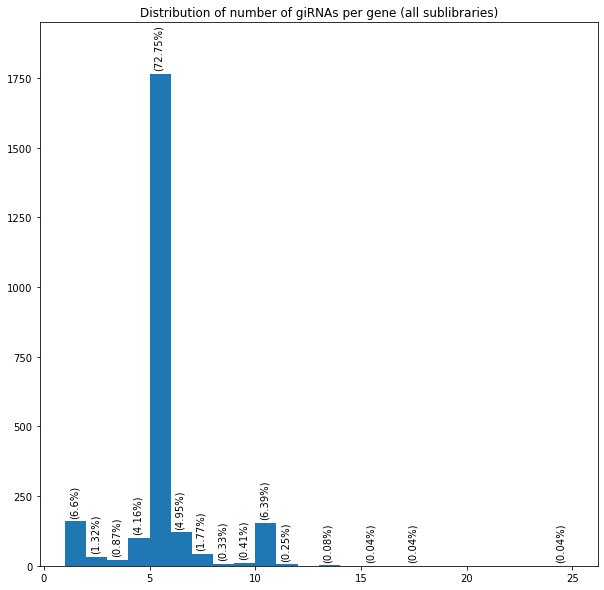

In [703]:
# Distribution of giRNAs per gene
girna_number_per_gene_group

# function to add value labels
def addperc(x,y):
    my_total = sum(x)
    my_perc = x/my_total 
    my_perc = [round(z, ndigits= 2) for z in list((x / my_total) * 100)]
    for i in range(int(max(y)-1)):
        if x[i] > 0:
            plt.text(i+1.2,x[i]+ 20, f"({my_perc[i]}%)", rotation='vertical')

# Plot histogram
fig, ax = plt.subplots(figsize=(10, 10),facecolor='w')
h = plt.hist(x=girna_number_per_gene_group, bins=max(girna_number_per_gene_group)-1)
plt.ylim(top=1950)
addperc(list(h[0]),list(h[1]))

plt.title(label='Distribution of number of giRNAs per gene (all sublibraries)')
plt.savefig('Distribution_number_giRNAs_per_gene.pdf')
plt.show()



In [704]:
# Keep only h4 giRNAs
data_h4 = data.loc[data['Sublibrary'] == 'h4']


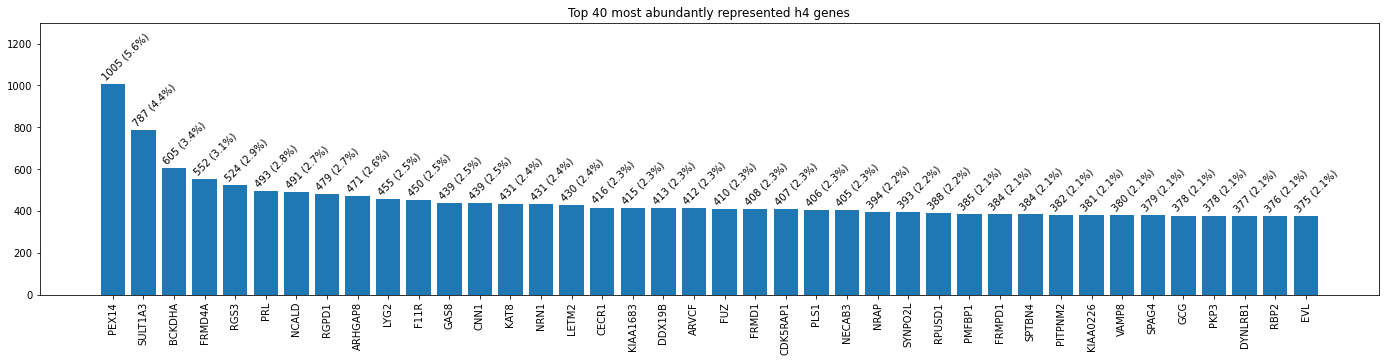

In [705]:
# How many giRNAs were assigned to each h4 gene?
girna_per_gene_h4 = data_h4.groupby(['Gene_name']).count().sort_values(by='Bias', ascending=False)['giRNAseq']
girna_per_gene_h4.head(n=20)

# Save results
girna_per_gene_h4.to_csv(path_or_buf='giRNAs_per_gene.csv')

# generate plot
xvals = list(girna_per_gene_h4.head(40).index)
yvals = list(girna_per_gene_h4.head(40).values)

fig, ax = plt.subplots(figsize=(24, 5),facecolor='w')
plt.bar(x=xvals, 
        height=yvals, 
        log=False)
plt.xticks(rotation=90)

# calling the function to add value labels
addlabels(xvals, yvals, rot=45)
plt.ylim(top=1300)
plt.title('Top 40 most abundantly represented h4 genes')

# save plot
plt.savefig('Top_40_most_abundantly_represented_h4_genes.pdf')

# display plot
plt.show()

In [706]:
girna_number_per_gene_group_h4 = data_h4.groupby(by=['Gene_name'])['giRNAseq'].unique()
girna_number_per_gene_group_h4

Gene_name
1-Mar      [GGATCCGGCTCGGGGCAAGG, GTGGCTTCTCCGCGAGGTGG, G...
14-Sep     [GCTACTATGAGGACTAACAG, GACAACTGGGGACAGTAGAA, G...
2-Mar      [GAGGCTTGGTCACCGCATTA, GGAGCGGGAATGCCTTAATG, G...
8-Sep      [GTGGGCTGGGACGAGCGCAG, GGGCAGGTGCGAAGATAGAG, G...
AAAS       [GCCTCGCCGTTTGTCCCTTG, GACGGCGAGGCGGAACTCAA, G...
                                 ...                        
ZNF563     [GAGGCTACACAGACGTTCCA, GGCGGGTCCCACTGTGACAG, G...
ZNF607     [GCCGCAGCTCCAGCACCCTA, GTGCTGGAGCTGCGGAGGAG, G...
ZNF692     [GAAGAAGAAACGGTGCCTCT, GAACGCTGCGCGCGCGAGGT, G...
ZNF696     [GCCCGCACGTGTCGGACCCC, GCGCGGCCGAGAGAACGGGG, G...
ZSCAN20    [GGTGAAGTGGGTGTCTCGGT, GTGTCTCGGTGGGTGAGTCC, G...
Name: giRNAseq, Length: 2206, dtype: object

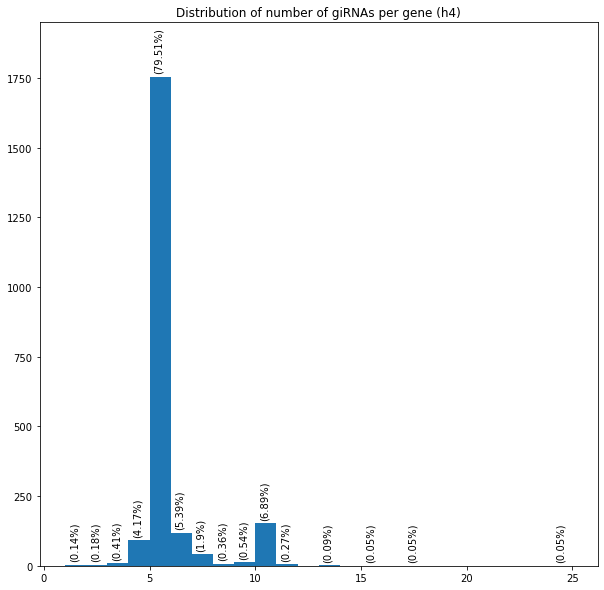

In [707]:
my_girna_per_gene_h4 = [len(z) for z in girna_number_per_gene_group_h4]
my_girna_per_gene_h4
my_girna_counts_per_gene_h4 = pd.DataFrame({'genes':girna_number_per_gene_group_h4.keys(), 'counts':my_girna_per_gene_h4})
my_girna_counts_per_gene_h4['counts']

#my_girna_counts_per_gene_h4
# Plot histogram
fig, ax = plt.subplots(figsize=(10, 10),facecolor='w')
h = plt.hist(x=my_girna_counts_per_gene_h4['counts'], bins=max(my_girna_counts_per_gene_h4['counts'])-1)
#h
plt.ylim(top=1950)
addperc(list(h[0]),list(h[1]))

plt.title(label='Distribution of number of giRNAs per gene (h4)')
plt.savefig('Distribution_number_giRNAs_per_h4_gene.pdf')
plt.show()


In [708]:
# Load annotation data
annot = pd.read_csv(filepath_or_buffer='./giRNA_library.csv', )

# Keep only h4 giRNAs/genes
annot_h4 = annot.loc[annot['Sublibrary'] == 'h4']
annot_h4

,gene,transcript,protospacer sequence,selection rank,Sublibrary,Source_file,Targeted_genes
165,ARHGAP8,P1,GCGCGCGGCCAGCACAGACC,3.0,h4,table3_hCRISPRiv10004,3
166,ARHGAP8,P1,GCGGCTCCAGGGCCTCCGGG,4.0,h4,table3_hCRISPRiv10005,3
167,ARHGAP8,P1,GTAGCCCGCGGACGGCTCAG,5.0,h4,table3_hCRISPRiv10006,3
168,ARHGAP8,P1,GCGCCGGGTTAATCATTGCA,6.0,h4,table3_hCRISPRiv10007,3
169,ARHGAP8,P1,GACAGACCCGGCGCAAACGG,7.0,h4,table3_hCRISPRiv10008,3
...,...,...,...,...,...,...,...
208240,negative_control,na,GTCCACCATCGGAGACAACT,NaN,h4,table3_hCRISPRiv208242,1
208241,negative_control,na,GGCGTCCCAGGCGAACCAAA,NaN,h4,table3_hCRISPRiv208243,1
208242,negative_control,na,GCAGGGCAATGCGCCACCAG,NaN,h4,table3_hCRISPRiv208244,1
208243,negative_control,na,GACCTCTTGACGGCCGGGCT,NaN,h4,table3_hCRISPRiv208245,1


In [709]:
# Proportion of TableS3_hCRISPERiv2 h4 giRNAs represented in the samples
data_h4_unique_girnas = pd.Series(data_h4['giRNAseq'].unique())
my_h4_girna_list = list(annot_h4['protospacer sequence'].unique())
data_h4_in_my_girna_list = data_h4_unique_girnas[data_h4_unique_girnas.isin(my_h4_girna_list)]
print('total h4 library giRNAs =',len(my_h4_girna_list))
print('total data_h4 giRNAs =',len(data_h4_unique_girnas))
my_percentage = round(len(data_h4_unique_girnas) * 100 / len(my_h4_girna_list), ndigits=2)
print('Percentage of represented h4 giRNAs from TableS3_hCRISPERiv2 file  =',my_percentage,'%')

total h4 library giRNAs = 24488
total data_h4 giRNAs = 12025
Percentage of represented h4 giRNAs from TableS3_hCRISPERiv2 file  = 49.11 %


In [710]:
# Proportion of TableS3_hCRISPERiv2 h4 giRNAs represented in the samples
data_h4_unique_genes = pd.Series(data_h4['Gene_name'].unique())
my_h4_gene_list = list(annot_h4['gene'].unique())
data_h4_in_my_girna_list = data_h4_unique_genes[data_h4_unique_genes.isin(my_h4_gene_list)]
print('total h4 library genes =',len(my_h4_gene_list))
print('total data_h4 genes =',len(data_h4_unique_genes))
my_percentage = round(len(data_h4_unique_genes) * 100 / len(my_h4_gene_list), ndigits=2)
print('Percentage of represented h4 genes from TableS3_hCRISPERiv2 file  =',my_percentage,'%')

total h4 library genes = 2220
total data_h4 genes = 2206
Percentage of represented h4 genes from TableS3_hCRISPERiv2 file  = 99.37 %
